In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import numpy as np
from PIL import Image

def load_dataset(path):
    images = []
    labels = []
    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if class_name == "malignant":
            label = 1
        elif class_name == "benign":
            label = 0
        else:
            continue
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = Image.open(image_path)
            image_np = np.array(image)
            images.append(image_np)
            labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = load_dataset("/content/drive/MyDrive/data/train")
test_images, test_labels = load_dataset("/content/drive/MyDrive/data/test")


In [4]:
train_images_scaled=train_images/225
test_images_scaled=test_images/225

In [5]:

train_data = list(zip(train_images_scaled, train_labels))
test_data = list(zip(test_images_scaled, test_labels))

print("Length of train_data:", len(train_data))
print("Length of test_data:", len(test_data))


Length of train_data: 2637
Length of test_data: 661


In [6]:
train_data[0][1].shape

()

array([[[0.85777778, 0.64      , 0.57333333],
        [0.88      , 0.64888889, 0.58666667],
        [0.87555556, 0.62666667, 0.56888889],
        ...,
        [0.85333333, 0.57333333, 0.49333333],
        [0.87555556, 0.58666667, 0.49777778],
        [0.88      , 0.62666667, 0.53777778]],

       [[0.86222222, 0.64444444, 0.58222222],
        [0.87555556, 0.64      , 0.57777778],
        [0.88      , 0.62222222, 0.56888889],
        ...,
        [0.85333333, 0.57777778, 0.47555556],
        [0.86222222, 0.59111111, 0.49777778],
        [0.86666667, 0.59111111, 0.48      ]],

       [[0.87111111, 0.63111111, 0.57777778],
        [0.87555556, 0.62666667, 0.56888889],
        [0.87555556, 0.62666667, 0.56888889],
        ...,
        [0.85777778, 0.57333333, 0.45333333],
        [0.85333333, 0.57333333, 0.49333333],
        [0.84888889, 0.57333333, 0.46222222]],

       ...,

       [[0.87555556, 0.66666667, 0.58666667],
        [0.87555556, 0.64888889, 0.56444444],
        [0.88444444, 0

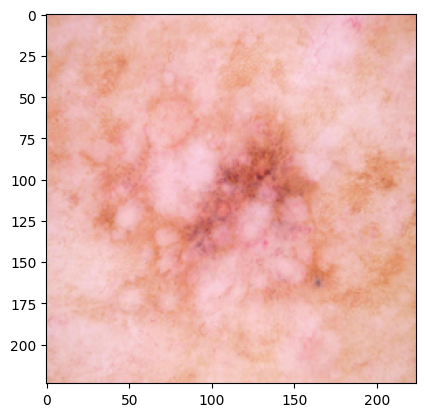

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0][0])
train_data[0][0]

In [8]:
train_data[0][1].shape

()

In [9]:
input_shape=[224, 224, 3]

In [10]:
import tensorflow as tf
from keras import  Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, Dot, Activation
from tensorflow.keras.activations import softmax
from keras import layers

input_shape = (224, 224, 3)

model = Sequential()

model.add(Conv2D(100, (2, 2), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(6, 6)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Flatten())

intermediate_features = model.layers[-1].output
print(intermediate_features.shape)

attention_weights_1 = Dense(1, activation='relu')(intermediate_features)
attention_weights_2 = Reshape((-1, 1))(attention_weights_1)
features = layers.Multiply()([intermediate_features, attention_weights_2])

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


(None, 288)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 100)     1300      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 37, 37, 100)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 37, 37, 100)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 64)        25664     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 9, 9, 64)          0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 9, 9, 

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow(train_images, train_labels, batch_size=batch_size)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=batch_size)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_images) // batch_size
)

Epoch 1/10
82/82 [==============================] - 40s 395ms/step - loss: 7.0356 - accuracy: 0.5347 - val_loss: 0.6931 - val_accuracy: 0.5484
Epoch 2/10
82/82 [==============================] - 36s 436ms/step - loss: 0.7178 - accuracy: 0.6173 - val_loss: 0.6934 - val_accuracy: 0.4563
Epoch 3/10
82/82 [==============================] - 34s 413ms/step - loss: 0.6041 - accuracy: 0.6687 - val_loss: 0.6949 - val_accuracy: 0.4609
Epoch 4/10
82/82 [==============================] - 36s 438ms/step - loss: 0.6257 - accuracy: 0.6495 - val_loss: 0.6960 - val_accuracy: 0.4531
Epoch 5/10
82/82 [==============================] - 34s 411ms/step - loss: 0.5711 - accuracy: 0.6960 - val_loss: 0.6981 - val_accuracy: 0.4484
Epoch 6/10
82/82 [==============================] - 34s 407ms/step - loss: 0.5565 - accuracy: 0.7083 - val_loss: 0.7016 - val_accuracy: 0.4594
Epoch 7/10
82/82 [==============================] - 34s 409ms/step - loss: 0.5445 - accuracy: 0.7255 - val_loss: 0.7038 - val_accuracy: 0.4563

In [15]:
loss, accuracy = model.evaluate(test_images, test_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


21/21 [==============================] - 1s 25ms/step - loss: 0.5620 - accuracy: 0.6959
Test Loss: 0.5620248317718506
Test Accuracy: 0.6959152817726135


In [16]:
test=Image.open("/content/drive/MyDrive/data/test/malignant/1007.jpg")

In [17]:
test=np.array(test)

In [18]:
img_path="/content/drive/MyDrive/data/test/malignant/1007.jpg"

In [19]:
from tensorflow.keras.preprocessing import image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img=img_array / 255.

In [20]:
model.predict(img)

1/1 [==============================] - 0s 363ms/step


array([[0.57057965]], dtype=float32)